In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.problems.run import compute_utils_per_params
import numpy as np
import json
import cvxpy as cp
from src.problems.visualizations import plot_groups_results_per_gamma

(CVXPY) Apr 14 08:16:15 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.12.4544). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 14 08:16:15 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.12.4544). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [4]:
# load data
with open("amazon_predictions.npy", "rb") as f:
    REL_MATRIX = np.load(f)

with open("amazon_user_groups.json", "r") as f:
    GROUPS_MAP = json.load(f)

In [8]:
N_RUNS = 5
N_CONSUMERS = 500
N_PRODUCERS = 200
K_REC = 10
GAMMAS = [0, 0.35, 0.7, 1]
ALPHAS = [0.1]
GROUPS = ["usage_group"]
METHOD = "cvar"
SOLVER = cp.SCIP

In [7]:
results = compute_utils_per_params(
    rel_matrix=REL_MATRIX,
    n_consumers=N_CONSUMERS,
    n_producers=N_PRODUCERS,
    k_rec=K_REC,
    gammas=GAMMAS,
    alphas=ALPHAS,
    groups_map=GROUPS_MAP,
    group_keys=GROUPS,
    solver=SOLVER,
    method=METHOD,
    n_runs=N_RUNS,
)

Runs:   0%|          | 0/5 [00:18<?, ?it/s]

pressed CTRL-C 1 times (5 times for forcing termination)


SolverError: Solver 'SCIP' failed. Try another solver, or solve with verbose=True for more information.

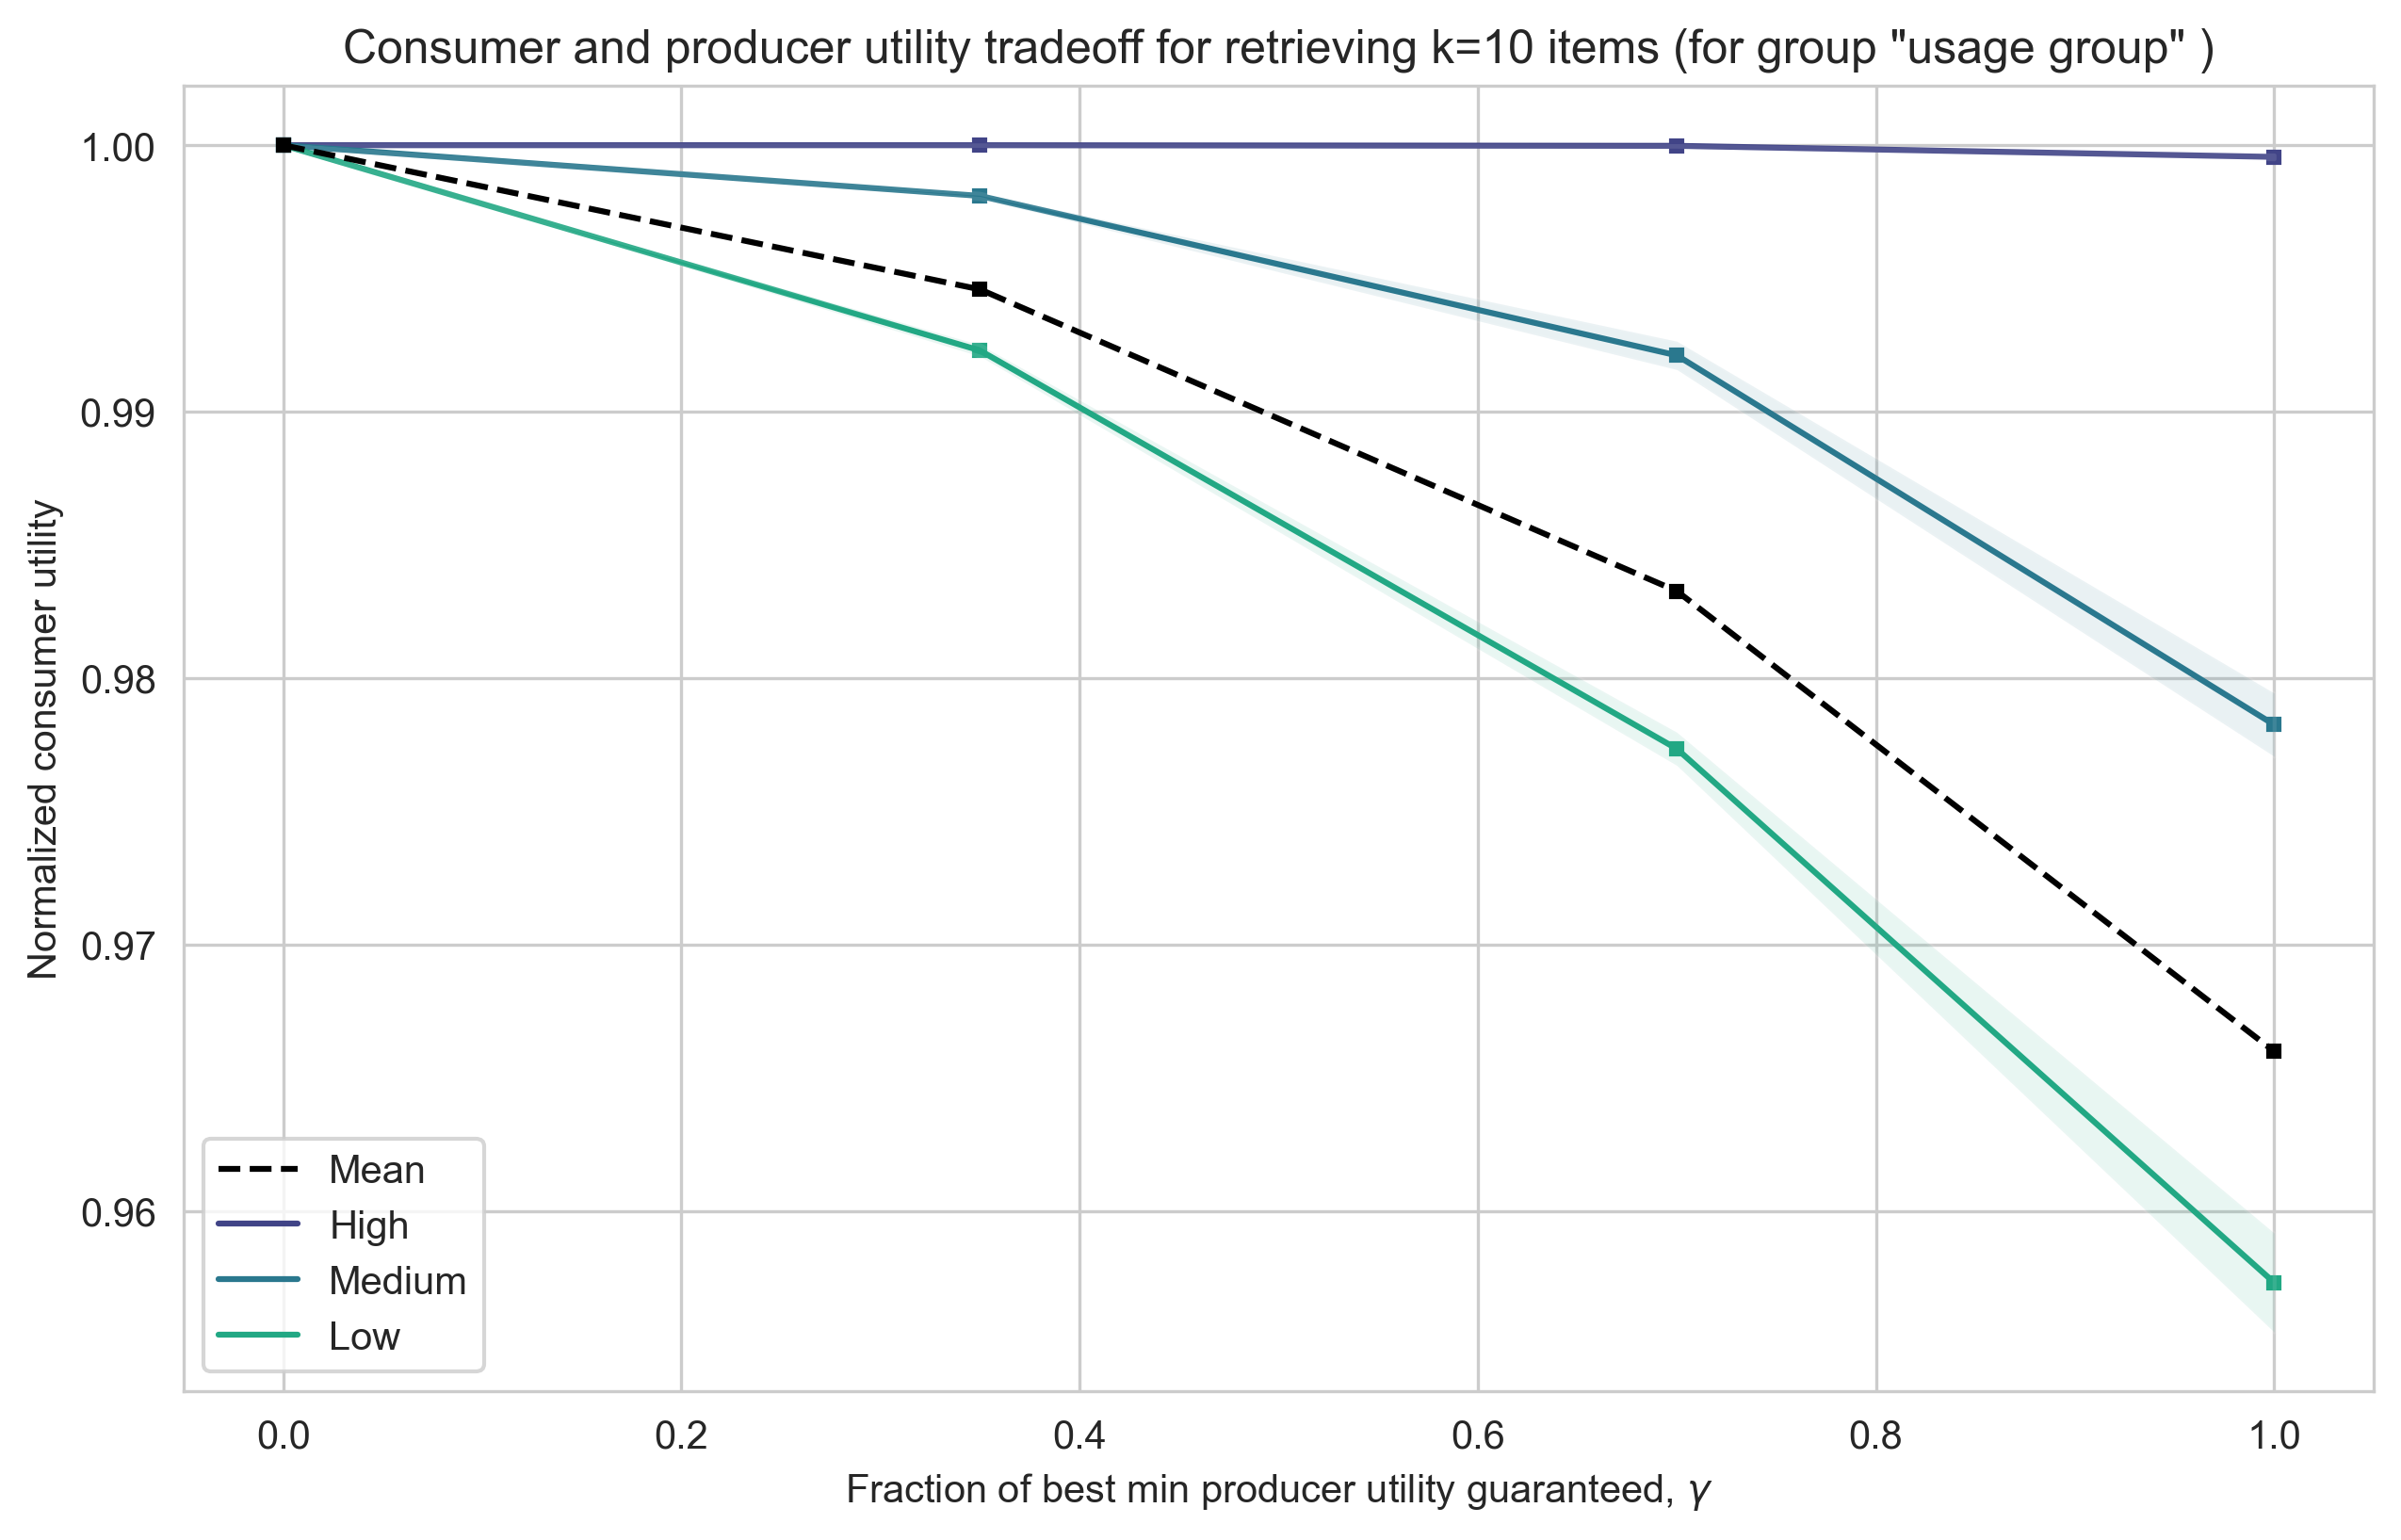

In [60]:
for group in GROUPS:
    plot_groups_results_per_gamma(
        results=results[group],
        groups_key=group,
        n_consumers=N_CONSUMERS,
        n_producers=N_PRODUCERS,
        n_runs=N_RUNS,
        k_rec=K_REC,
        method=METHOD,
        save_path="results/"
    )

In [35]:
results = compute_utils_per_params(
    rel_matrix=REL_MATRIX,
    n_consumers=500,
    n_producers=200,
    k_rec=K_REC,
    gammas=[0.1, 0.35, 0.5, 0.75, 1],
    alphas=[0, 0.25, 0.5, 0.7, 0.95, 1],
    groups_map=GROUPS_MAP,
    group_keys=GROUPS,
    solver=SOLVER,
    method=METHOD,
    n_runs=5,
)

Runs:   0%|          | 0/5 [00:00<?, ?it/s]


Runs:   0%|          | 0/5 [00:46<?, ?it/s]

pressed CTRL-C 1 times (5 times for forcing termination)


SolverError: Solver 'SCIP' failed. Try another solver, or solve with verbose=True for more information.

<>:62: SyntaxWarning: invalid escape sequence '\g'
<>:62: SyntaxWarning: invalid escape sequence '\g'
/var/folders/9l/_y964wyn5fx6bcqmbqjpd9780000gp/T/ipykernel_2224/1928792538.py:62: SyntaxWarning: invalid escape sequence '\g'
  label=f"$\gamma$ {gamma}",


Alphas: dict_keys([0, 0.25, 0.5, 0.7])
defaultdict(<function plot_groups_results_per_alpha.<locals>.<lambda> at 0x384bdf060>, {0.3: defaultdict(<class 'list'>, {0: [[np.float64(0.99468876755783), np.float64(0.9981797532728462), np.float64(0.9999973802129651)], [np.float64(0.9946544350828755), np.float64(0.998868060703525), np.float64(1.0)], [np.float64(0.9946240590307942), np.float64(0.9985793248078404), np.float64(0.9999987460517166)]], 0.25: [[np.float64(0.9947001759043986), np.float64(0.9981797532728462), np.float64(0.9999729912344699)], [np.float64(0.9946544350828755), np.float64(0.998868060703525), np.float64(1.0)], [np.float64(0.9946240590307942), np.float64(0.9985793248078404), np.float64(0.9999987460517166)]], 0.5: [[np.float64(0.9964209199351957), np.float64(0.9964211796170187), np.float64(0.9964223975735683)], [np.float64(0.996569495228761), np.float64(0.9965708985213846), np.float64(0.9965803391438391)], [np.float64(0.9964708880074211), np.float64(0.9964699081712834), np.flo

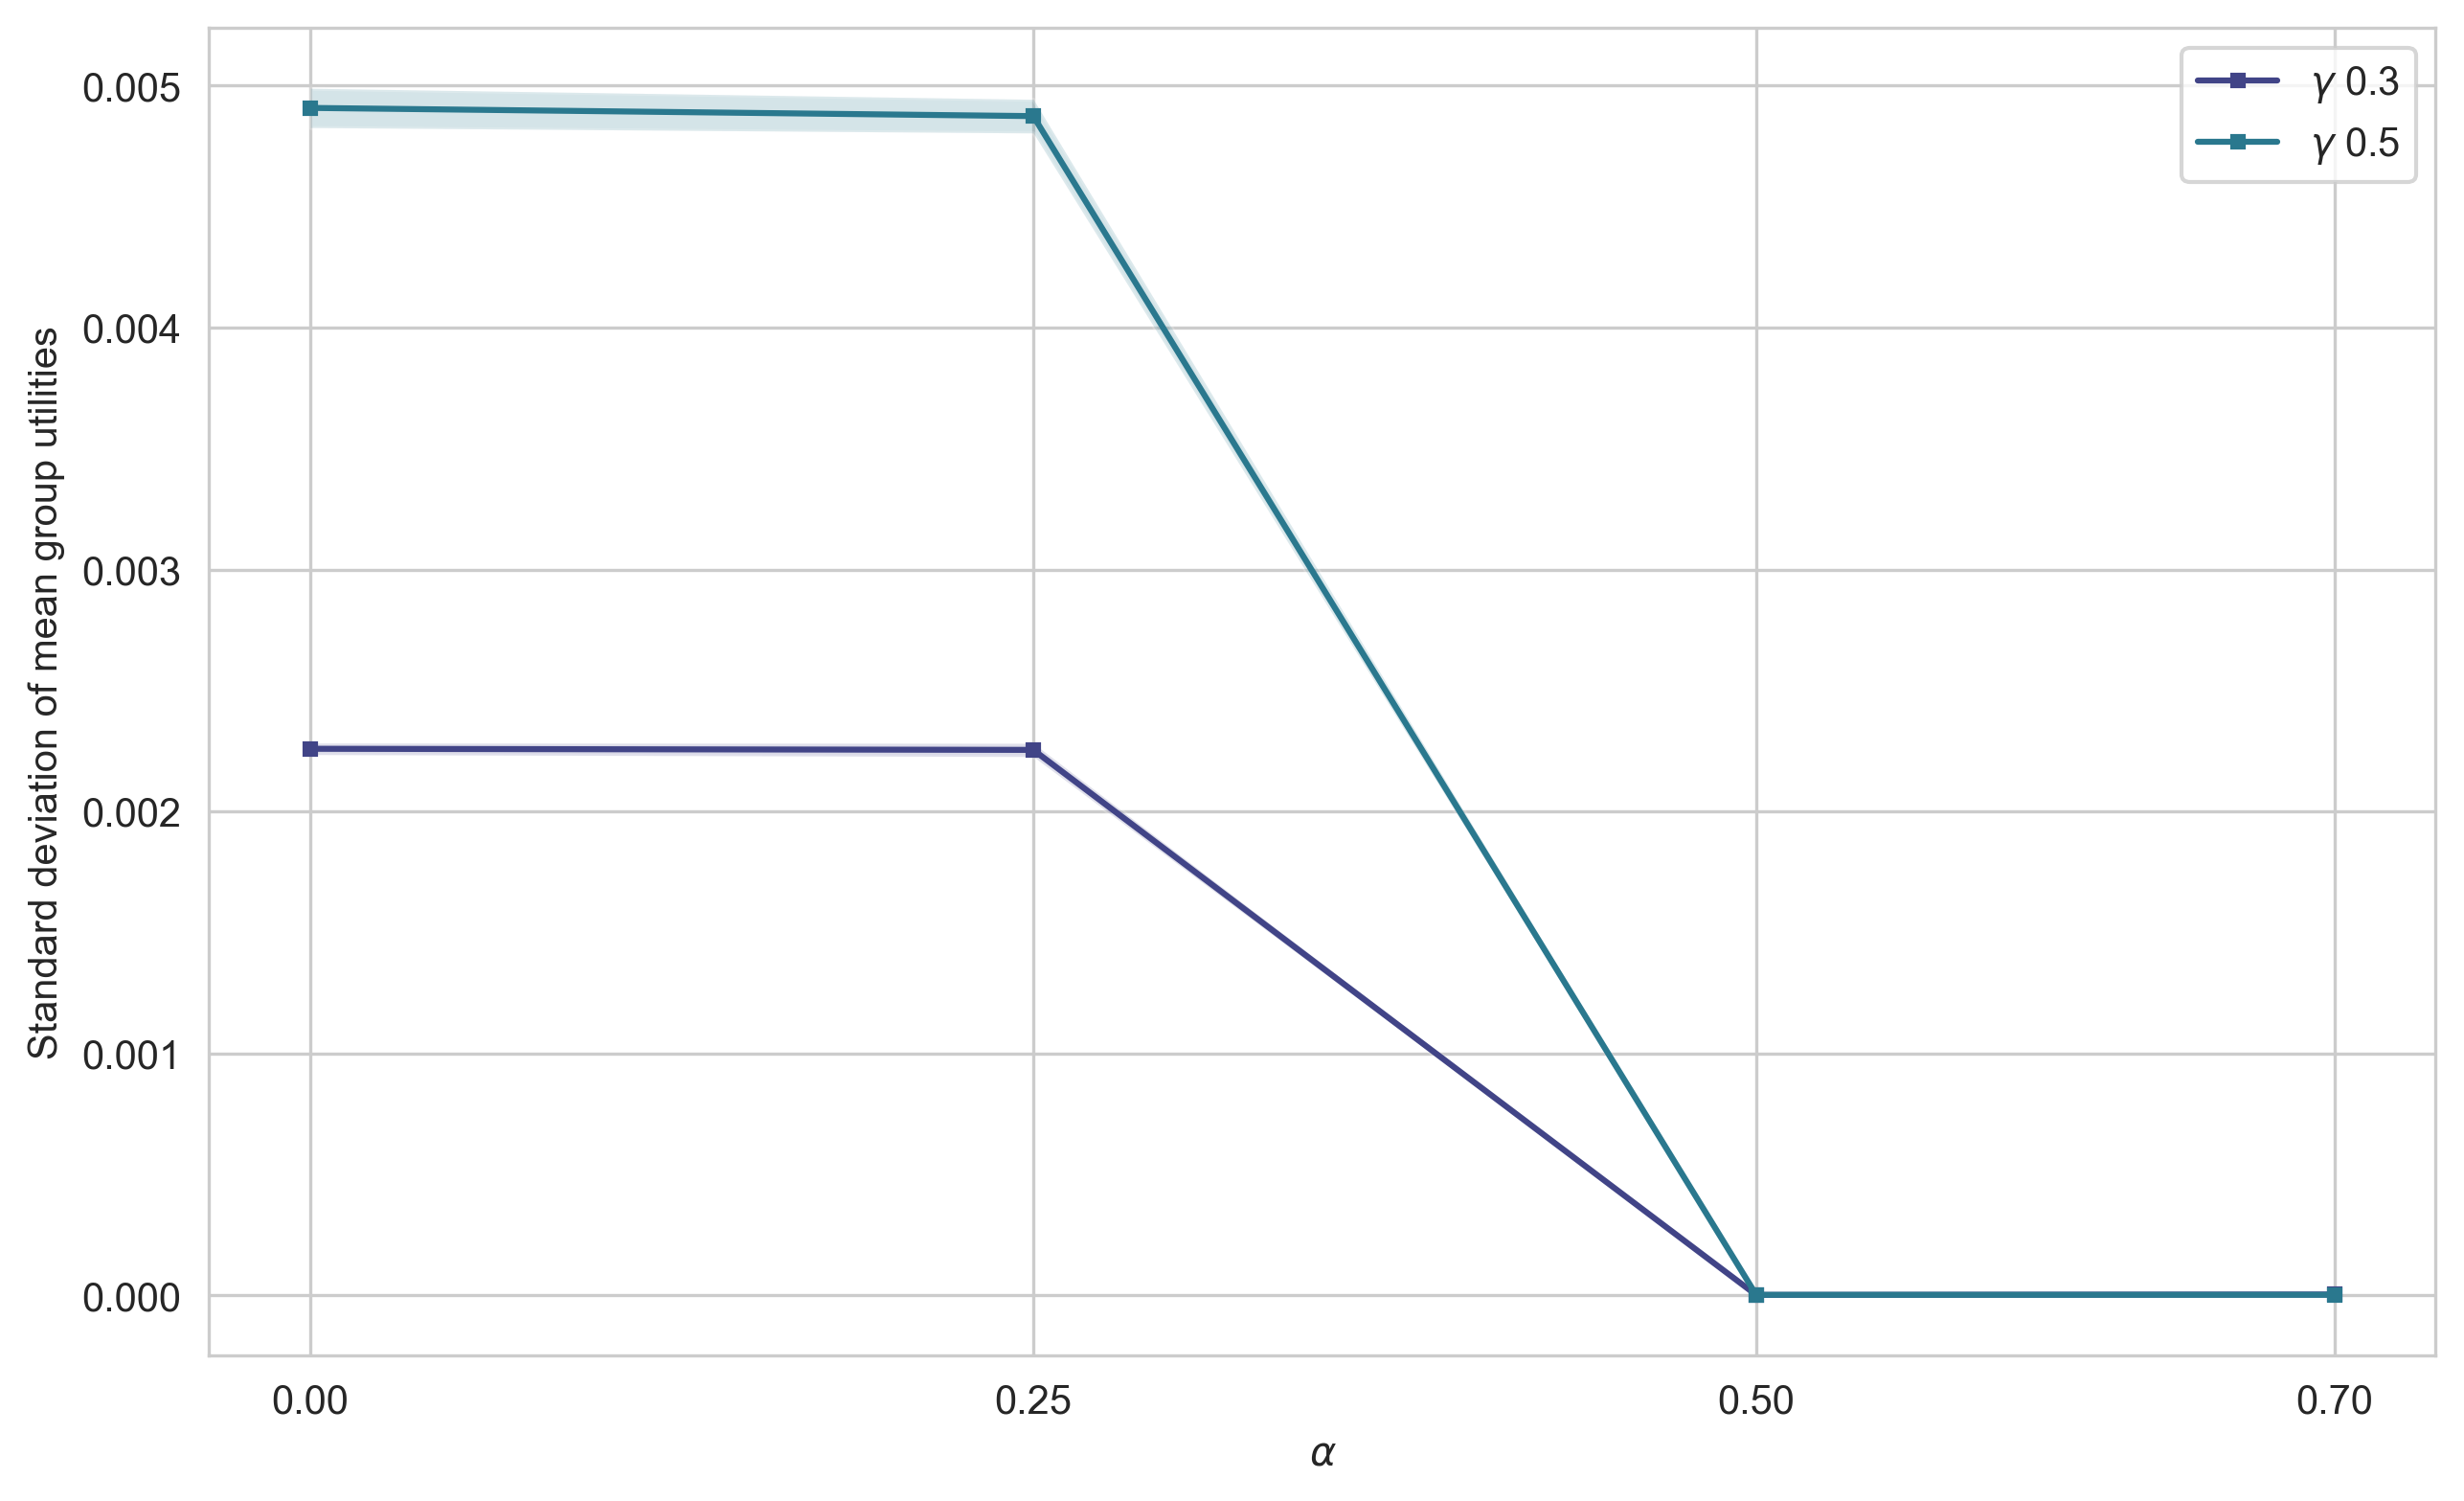

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import defaultdict

def plot_groups_results_per_alpha(
    results: dict,
    groups_key: str,
    n_consumers: int,
    n_producers: int,
    n_runs: int,
    k_rec: int,
    method: str,
    save_path: Path,
) -> None:
    sns.set_style("whitegrid")

    alphas = results["all"].keys()

    print(f"Alphas: {alphas}")

    if not Path(save_path).exists():
        Path(save_path).mkdir(parents=True)


    plt.figure(figsize=(10, 6), dpi=300)
    sns.set_palette(sns.color_palette("viridis", len(results.keys())))

    results_per_gamma = defaultdict(lambda: defaultdict(list))

    for group, group_results in results.items():
        if group == "all":
            continue
        for alpha, alpha_results in group_results.items():
            for gamma, runs in alpha_results.items():
                for i, run in enumerate(runs):
                    if len(results_per_gamma[gamma][alpha]) < i + 1:
                        results_per_gamma[gamma][alpha].append([np.mean(run)])
                    else:
                        results_per_gamma[gamma][alpha][i].append(np.mean(run))

    print(results_per_gamma)

    for gamma, alpha_results in results_per_gamma.items():
        x_alphas = []
        y_alphas = []
        errs = []
        for alpha, runs in alpha_results.items():
            run_stds = [np.std(run) for run in runs]
            print(run_stds)
            mean_of_run_stds = np.mean(run_stds, axis=0)
            standard_error_of_mean = np.std(run_stds, axis=0) / np.sqrt(len(runs))
            x_alphas.append(alpha)
            y_alphas.append(mean_of_run_stds)
            errs.append(standard_error_of_mean)

        print(f"Gamma: {gamma}, Alphas: {x_alphas}, Means: {y_alphas}, Errors: {errs}")

        plt.plot(
            x_alphas,
            y_alphas,
            label=f"$\gamma$ {gamma}",
            marker="s",
            markersize=3,
        )
        plt.fill_between(
            x_alphas,
            np.array(y_alphas) - np.array(errs),
            np.array(y_alphas) + np.array(errs),
            alpha=0.2,
        )
        plt.xticks(x_alphas)
        plt.xlabel("$\\alpha$")
        plt.ylabel("Standard deviation of mean group utilities")

    plt.legend()
    plt.savefig(
        Path(save_path) / f"{groups_key}_results_per_alpha.png",
    )








for group in GROUPS:
    plot_groups_results_per_alpha(
        results=results[group],
        groups_key=group,
        n_consumers=N_CONSUMERS,
        n_producers=N_PRODUCERS,
        n_runs=N_RUNS,
        k_rec=K_REC,
        method=METHOD,
        save_path="results/"
    )